## MELBOURNE Housing Market

In [325]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [358]:
housing_master = pd.read_csv("C:/Users/ushai/Dropbox/Data Science/THINKFUL/Thinkful/PROJECTS/Housing Project/Melbourne_housing_FULL.csv")

### 1.1. Converting non numeric values to null

In [359]:
# Converting all non numeric values to null
housing_master['Price'] = pd.to_numeric(housing_master['Price'], errors='coerce')
housing_master['Distance'] = pd.to_numeric(housing_master['Distance'], errors='coerce')
housing_master['Postcode'] = pd.to_numeric(housing_master['Postcode'], errors='coerce')
housing_master['Bedroom2'] = pd.to_numeric(housing_master['Bedroom2'], errors='coerce')
housing_master['Bathroom'] = pd.to_numeric(housing_master['Bathroom'], errors='coerce')
housing_master['Car'] = pd.to_numeric(housing_master['Car'], errors='coerce')
housing_master['Landsize'] = pd.to_numeric(housing_master['Landsize'], errors='coerce')
housing_master['BuildingArea'] = pd.to_numeric(housing_master['BuildingArea'], errors='coerce')
housing_master['YearBuilt'] = pd.to_numeric(housing_master['YearBuilt'], errors='coerce')
housing_master['Lattitude'] = pd.to_numeric(housing_master['Lattitude'], errors='coerce')
housing_master['Longtitude'] = pd.to_numeric(housing_master['Longtitude'], errors='coerce')
housing_master['BuildingArea'] = pd.to_numeric(housing_master['BuildingArea'], errors='coerce')

### 1.2. Dropping null values

In [360]:
housing_master = housing_master.dropna()

In [361]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 1.3. Dropping unnecessary columns

In [330]:
housing_master.drop(['SellerG','Lattitude', 'Longtitude'], axis=1, inplace=True)

In [331]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


### 1.4. Resetting, Renaming Index

In [332]:
# resetting index
housing_master.reset_index(drop = True, inplace = True)

In [333]:
# Naming the Index
housing_master.index.name = 'Index'

In [334]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
Index,,,,,,,,,,,,,,,,,,
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


### 1.5. Saving to 'CSV'

In [335]:
# Saving dataframe to csv
housing_master.to_csv('housing.csv')

## 2.0. AGGREGATIONS

In [336]:
# Grouped by suburb for average Price, Distance and Landsize.
housing_updated = housing_master.groupby(['Suburb']).mean()[['Price', 'Distance', 'Landsize']].reset_index()

In [337]:
housing_updated.head()

,Suburb,Price,Distance,Landsize
0,Abbotsford,1.126410e+06,2.628205,227.128205
1,Aberfeldie,1.462966e+06,8.548276,540.275862
2,Airport West,7.668077e+05,12.069231,424.384615
3,Albanvale,5.403333e+05,14.000000,552.000000
4,Albert Park,1.950985e+06,3.238235,152.941176


### 2.1.Top Ten suburbs with the highest average price

In [338]:
Top_ten_Suburbs_Price = housing_master.groupby(['Suburb']).mean()[['Price']].nlargest(10, 'Price').reset_index()
Top_ten_Suburbs_Price.head()

,Suburb,Price
0,Kooyong,3.080000e+06
1,Middle Park,2.665115e+06
2,Canterbury,2.467463e+06
3,Deepdene,2.380000e+06
4,Malvern,2.272595e+06


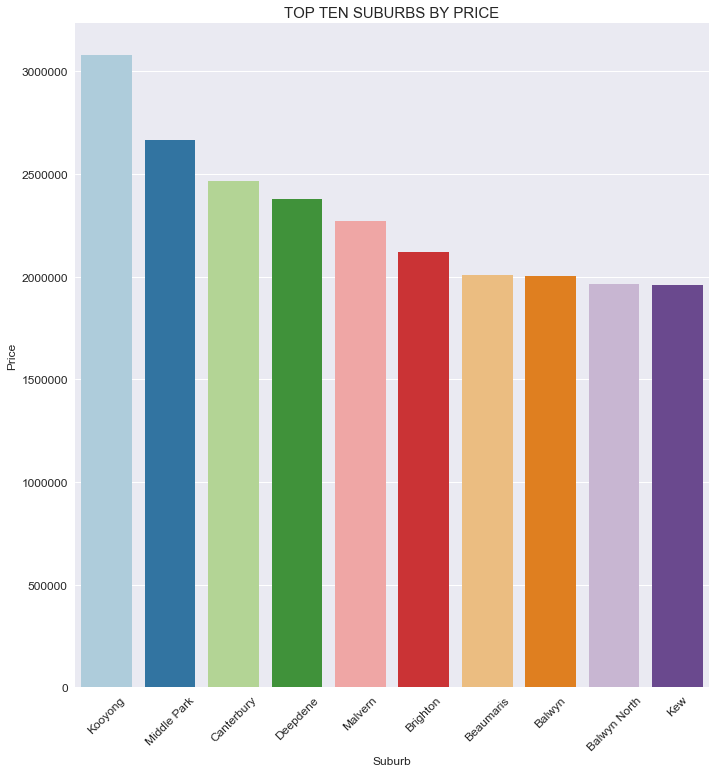

In [339]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Price", data=Top_ten_Suburbs_Price,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS BY PRICE',fontsize=15)
plt.show()

### 2.2. Top Ten suburbs with the lowest average distance from CBD

In [340]:
Top_ten_Suburbs_with_lowest_distance_CBD = housing_master.groupby(['Suburb']).mean()[['Distance']].nsmallest(10, 'Distance').reset_index()
Top_ten_Suburbs_with_lowest_distance_CBD.head()

,Suburb,Distance
0,Southbank,1.131818
1,East Melbourne,1.385714
2,Collingwood,1.714286
3,Carlton,1.754545
4,Fitzroy,1.785714


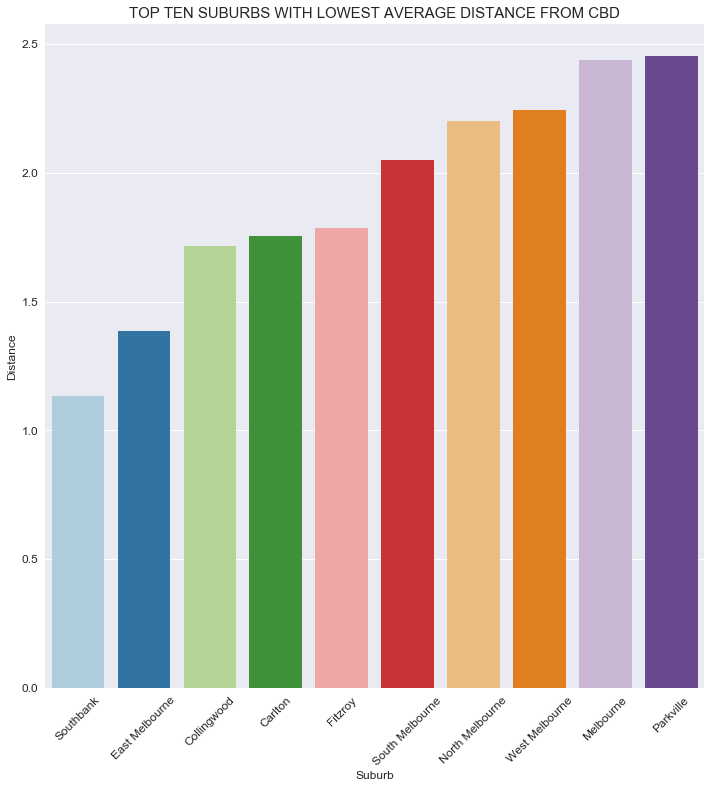

In [341]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Distance", data=Top_ten_Suburbs_with_lowest_distance_CBD,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS WITH LOWEST AVERAGE DISTANCE FROM CBD',fontsize=15)
plt.show()

### 2.3. SCATTER PLOT PRICE Vs. DISTANCE

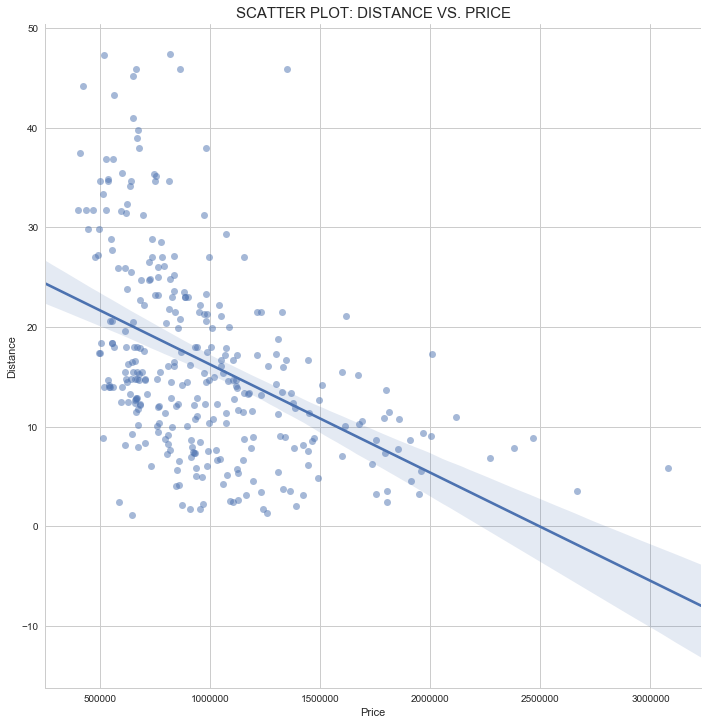

In [342]:
sns.set(style="whitegrid")
sns.lmplot(y='Distance', # Variable 1.
               x='Price', # Variable 2.
               data=housing_updated, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.

plt.title('SCATTER PLOT: DISTANCE VS. PRICE', fontsize=15)
plt.show()

### 2.4. Top Ten suburbs with the largest average Landsize

In [343]:
top_ten_suburbs_by_landsize = housing_master.groupby(['Suburb']).mean()[['Price','Distance','Landsize']].nlargest(10, 'Landsize').reset_index()
top_ten_suburbs_by_landsize.head()

,Suburb,Price,Distance,Landsize
0,Bullengarook,865000.0,45.9,42800.00
1,Gisborne South,1350000.0,45.9,40469.00
2,Gisborne,664625.0,45.9,5882.00
3,Mickleham,982500.0,20.6,5551.00
4,Langwarrin,653000.0,41.0,2969.75


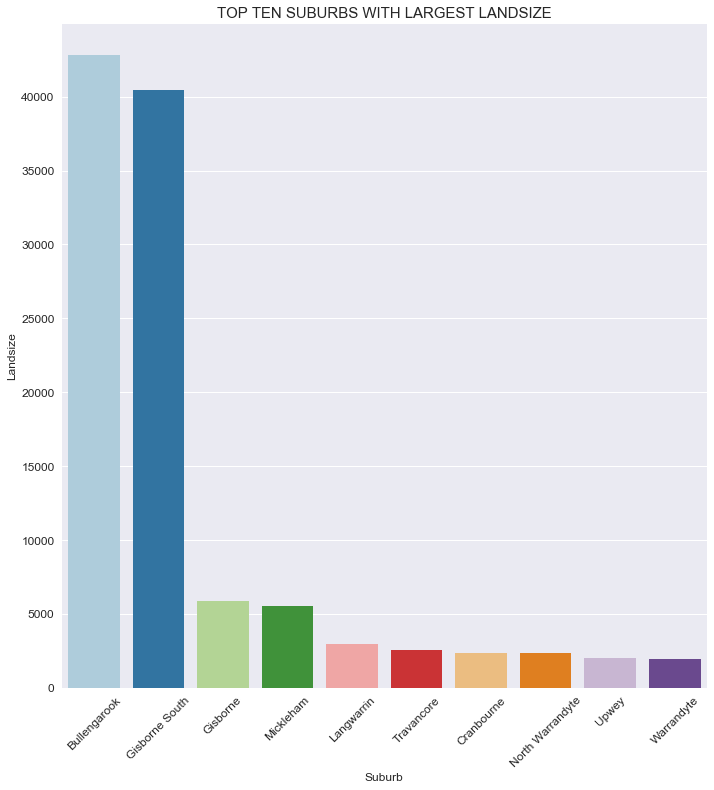

In [344]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Landsize", data=top_ten_suburbs_by_landsize,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS WITH LARGEST LANDSIZE',fontsize=15)
plt.show()

### 2.5. SCATTER PLOT LANDSIZE VS. PRICE

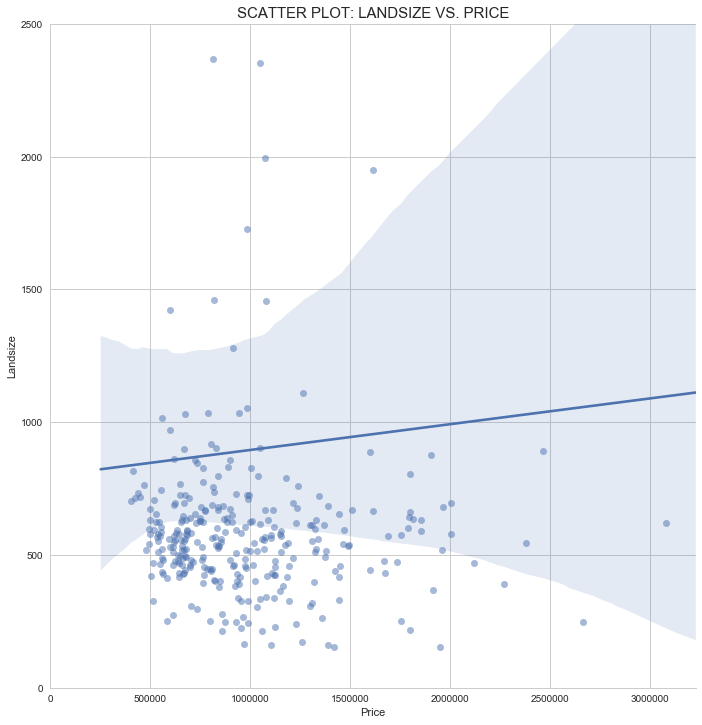

In [345]:
sns.set(style="whitegrid")
sns.lmplot(y='Landsize', # Variable 1.
               x='Price', # Variable 2.
               data=housing_updated, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.
plt.ylim(0, 2500 )
plt.xlim(0, None )
plt.title('SCATTER PLOT: LANDSIZE VS. PRICE', fontsize=15)
plt.show()

Business problem is that the price of the house is dependent upon the three choosen attributes.

# 3.0. HOMES 

In [346]:
# Grouped by Suburb and Type
housing_by_suburb_and_type = housing_master.groupby(['Suburb', 'Type']).mean()[['Price', 'Distance', 'Landsize']].reset_index()

In [347]:
housing_by_suburb_and_type.head(2)

,Suburb,Type,Price,Distance,Landsize
0,Abbotsford,h,1.237656e+06,2.609375,183.687500
1,Abbotsford,u,6.178571e+05,2.714286,425.714286


In [348]:
# Homes only
homes = housing_by_suburb_and_type[(housing_by_suburb_and_type['Type'] == 'h')].reset_index()

In [349]:
homes.head(2)

,index,Suburb,Type,Price,Distance,Landsize
0,0,Abbotsford,h,1.237656e+06,2.609375,183.687500
1,2,Aberfeldie,h,1.679909e+06,8.518182,610.409091


In [350]:
# added a new column 'Distance_category' with a condition.
homes['Distance_category'] = homes.Distance.apply(lambda x: 'long' if x > 20 else 'short')

In [351]:
#  added a new column 'Landsize_category' with a condition.
homes['Landsize_category'] = homes.Landsize.apply(lambda x:'large' if x > 700 else 'small')

In [352]:
homes.head()

,index,Suburb,Type,Price,Distance,Landsize,Distance_category,Landsize_category
0,0,Abbotsford,h,1.237656e+06,2.609375,183.687500,short,small
1,2,Aberfeldie,h,1.679909e+06,8.518182,610.409091,short,small
2,5,Airport West,h,8.087500e+05,11.863889,520.972222,short,small
3,8,Albanvale,h,5.403333e+05,14.000000,552.000000,short,small
4,9,Albert Park,h,2.067935e+06,3.241935,157.290323,short,small


## 3.1. Histograms for home  ' Price ' and ' Distance '

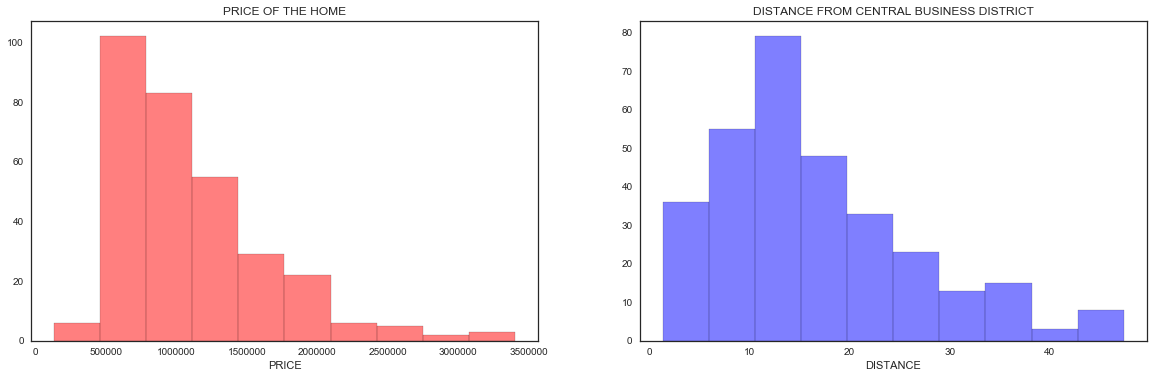

In [353]:
# style options = white,whitegrid,ticks,darkgrid
# other options include = bins=12, normed=True, histtype='step', linewidth=2

sns.set(style="white")

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.hist(homes['Price'], color='red', alpha=.5, edgecolor = 'black')
plt.xlabel('PRICE')
plt.title('PRICE OF THE HOME')

plt.subplot(3,2,2)
plt.hist(homes['Distance'], color='blue', alpha=.5, edgecolor = 'black')
plt.xlabel('DISTANCE')
plt.title('DISTANCE FROM CENTRAL BUSINESS DISTRICT')

plt.show()

## 3.2. Histograms for Home Price when Distance is 'short' or 'long'

In [354]:
Distance_short = homes[(homes['Distance_category'] == 'short')]
Distance_long = homes[(homes['Distance_category'] == 'long')]

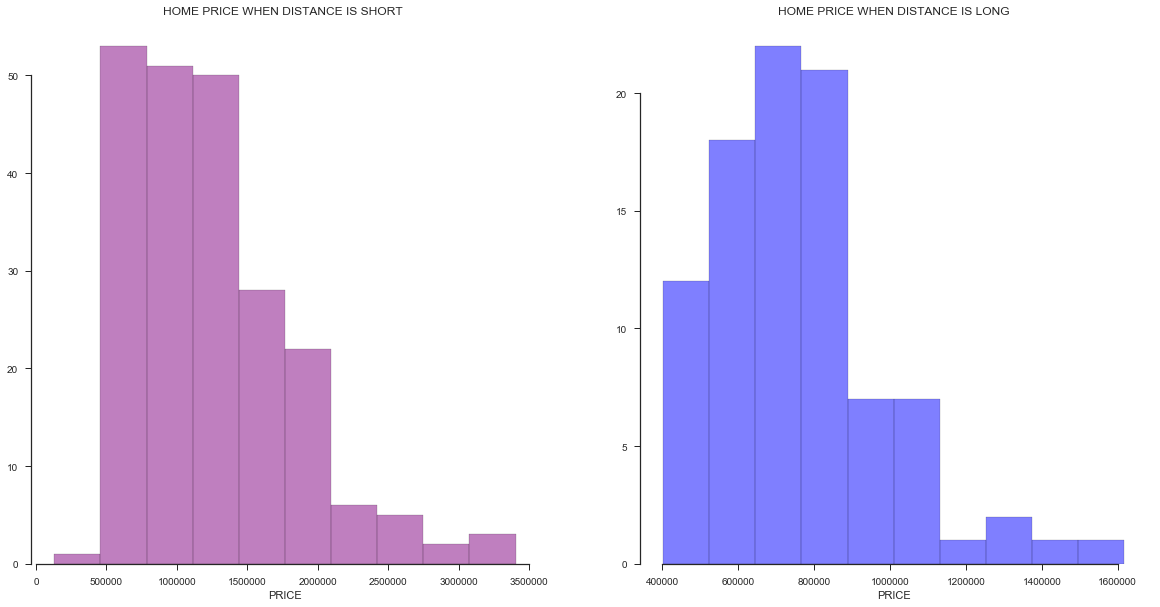

In [355]:
sns.set(style="ticks")

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(Distance_short['Price'], color='purple', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN DISTANCE IS SHORT ')

plt.subplot(1,2,2)
plt.hist(Distance_long['Price'], color='blue', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN DISTANCE IS LONG')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show()

## 3.3. Histograms for Home Price when Landsize is 'small' or 'large'

In [356]:
landsize_small = homes[(homes['Landsize_category'] == 'small')]
landsize_large = homes[(homes['Landsize_category'] == 'large')]

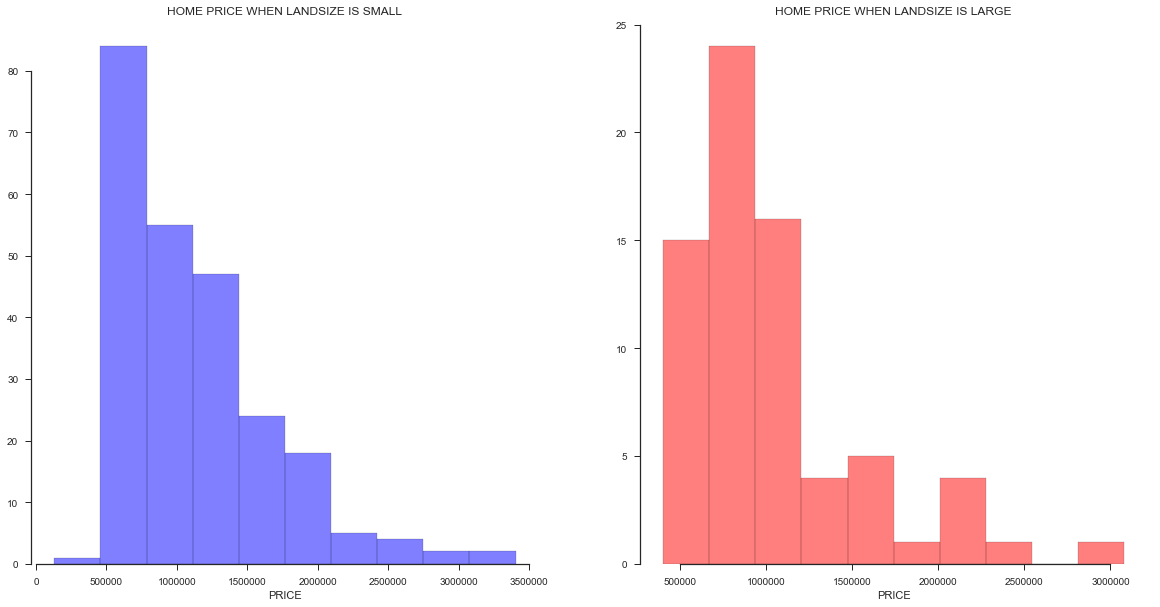

In [357]:
sns.set(style="ticks")

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(landsize_small['Price'], color='blue', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN LANDSIZE IS SMALL')

plt.subplot(1,2,2)
plt.hist(landsize_large['Price'], color='red', edgecolor = 'black', alpha=.5, bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN LANDSIZE IS LARGE')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show()